In [ ]:
## DETAILS ##
# Data set 
# https://www.kaggle.com/mloey1/ahcd1

# Building a model to predict the classification of images of written arabic characters. 

In [48]:
# Import Libraries #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
# List of arabic characters
arabic_characters = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                    'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
                    'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']

In [32]:
# Import Data 
x_train = pd.read_csv("data/character_dataset/csvTrainImages 13440x1024.csv",header=None)
y_train = pd.read_csv("data/character_dataset/csvTrainLabel 13440x1.csv",header=None)

x_test = pd.read_csv("data/character_dataset/csvTestImages 3360x1024.csv",header=None)
y_test = pd.read_csv("data/character_dataset/csvTestLabel 3360x1.csv",header=None)


print("x_train.shape =", x_train.shape, "\ny_train.shape =", y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (13440, 1024) 
y_train.shape = (13440, 1) 
x_test.shape = (3360, 1024) 
y_test.shape = (3360, 1)


In [34]:
# Size of images
print(x_train.head())
print("\nPreview of an image in Greyscale Values")
print(x_train.loc[0,].unique())

   0     1     2     3     4     5     6     7     8     9     ...  1014  \
0     0     0     0     0     0     0     0     0     0     0  ...     0   
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0     0     0     0     0     0     0  ...     0   
3     0     0     0     0     0     0     0     0     0     0  ...     0   
4     0     0     0     0     0     0     0     0     0     0  ...     0   

   1015  1016  1017  1018  1019  1020  1021  1022  1023  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 1024 columns]

Preview of an image in Greyscale Values
[  0  33  12  51 227 144   5   3 204 255 156  70 220 157 129 217  32  44
 236 249  68   2 187 252 109 214 237 101 145 213 216 244

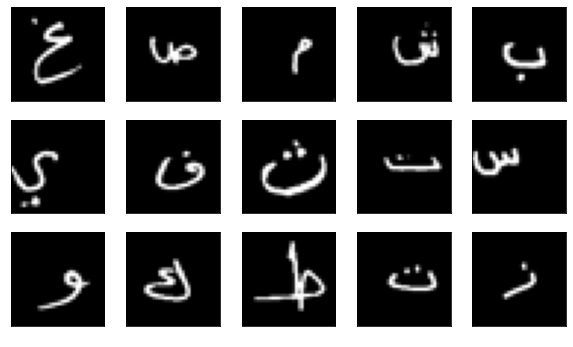

In [21]:
# Show sample images
ra = np.random.randint(0, x_train.shape[0], size=25)
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32).T,"gray")
    plt.xlabel(arabic_characters[int(y_train[ra[i]][0])]).set_color("white")
plt.show()

In [35]:
# View unique values in y_train
y_train[0].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [41]:
### Data Prep ###

# Change labels in training datasets to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, '\n', y_test.shape)

(13440, 28) 	 (3360, 28)


In [39]:
## Reshape Dataframes ##
x_train = x_train.to_numpy().reshape(-1,32,32,1)
y_train = y_train.to_numpy()
x_test = x_test.to_numpy().reshape(-1,32,32,1)
y_test = y_test.to_numpy()

print(x_train.shape, '\n', x_test.shape)

x_train = x_train / 255.0
y_train = y_train - 1
x_test = x_test / 255.0
y_test = y_test - 1

(13440, 32, 32, 1) 	 (3360, 32, 32, 1)


In [44]:
## Split Data Set into Train/Test ##

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)
print('x train/test:\n',x_train.shape, '\n', x_test.shape)
print('y train/test:\n', y_train.shape, '\n', y_test.shape)

x train/test:
 (10752, 32, 32, 1) 
 (3360, 32, 32, 1)
y train/test:
 (10752, 28) 
 (3360, 28)


In [46]:
# Create Sequential CNN # 
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64, 5, activation='relu', input_shape=(32,32,1), padding="same"))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(128, 3, activation='relu', padding="same"))
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding="same"))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding="same"))
model.add(keras.layers.Conv2D(64, 3, activation='relu', padding="same"))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(28, activation='softmax'))

# Display the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)       

In [49]:
## Create Checkpoints and Callbacks ##
# Created in case of computational interruption
checkpoint = keras.callbacks.ModelCheckpoint('model1.h5', save_best_only=True)
earlystop = keras.callbacks.EarlyStopping(patience=10, monitor='val_accuracy', restore_best_weights=True)

In [51]:
# Compile Model # 
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

# Fit model to the data # 
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val), callbacks=[checkpoint, earlystop])

Epoch 1/100
336/336 [==============================] - 86s 251ms/step - loss: 0.9985 - accuracy: 0.6858 - val_loss: 10.3498 - val_accuracy: 0.0714
Epoch 2/100
336/336 [==============================] - 82s 245ms/step - loss: 0.2667 - accuracy: 0.9140 - val_loss: 0.6848 - val_accuracy: 0.7946
Epoch 3/100
336/336 [==============================] - 91s 271ms/step - loss: 0.1735 - accuracy: 0.9411 - val_loss: 0.2346 - val_accuracy: 0.9163
Epoch 4/100
336/336 [==============================] - 78s 231ms/step - loss: 0.1277 - accuracy: 0.9589 - val_loss: 0.4175 - val_accuracy: 0.8690
Epoch 5/100
 85/336 [======>.......................] - ETA: 57s - loss: 0.0735 - accuracy: 0.9765

KeyboardInterrupt: 

NameError: name 'history' is not defined

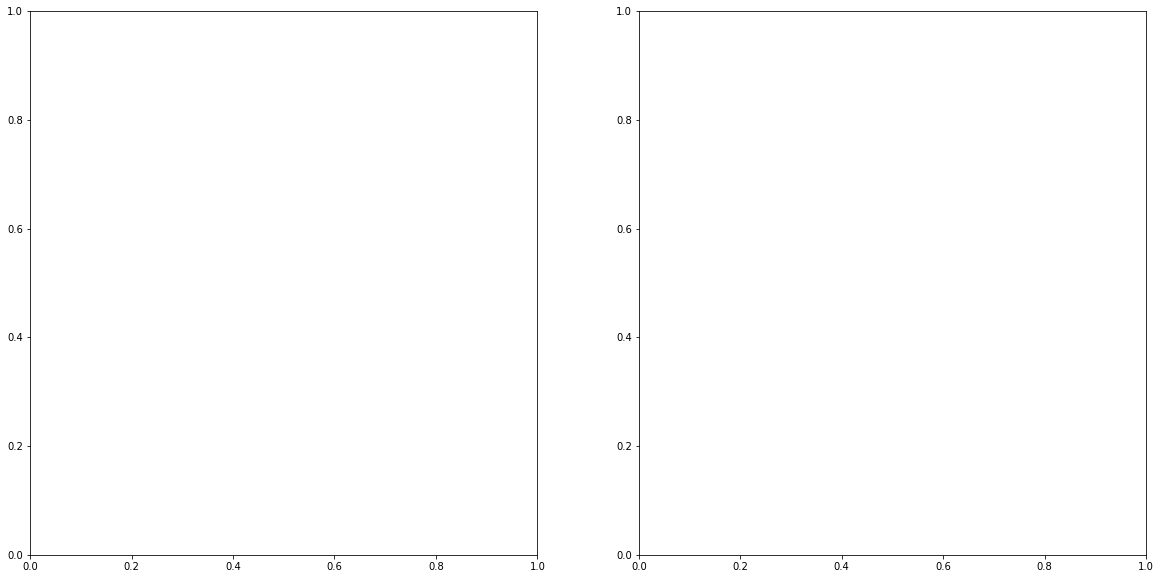

In [52]:
# Display accuracy and losses
fig, (a1,a2) = plt.subplots(1,2,figsize=(20,10))

a1.plot(history.history["accuracy"], label="Training accuracy")
a1.plot(history.history["val_accuracy"], label="Validation accuracy")
a1.legend()

a2.plot(history.history["loss"], label="Training loss")
a2.plot(history.history["val_loss"], label="Validation loss")
a2.legend()

plt.show()


In [ ]:
## Test Accuracy of model on testing data

y_pred = model.predict(X_test)
y_obs = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

test_acc = accuracy_score(y_true, y_obs)
cm = confusion_matrix(y_true, y_obs)

print("Test Accuracy: ",test_acc)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt="d", ax=ax)